### ES 404 Assignment 2

Creating Adjacency Matrix


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from community import community_louvain

In [3]:


# Load cleaned stock data
df = pd.read_csv("outputs/all_stocks_closing_prices_2020_cleaned.csv")

# Drop the 'Date' column for correlation calculations
stock_data = df.drop(columns=['Date'])

# Compute Pearson correlation matrix
correlation_matrix = stock_data.corr()

# Set diagonal to 0 (correlation of a stock with itself)
np.fill_diagonal(correlation_matrix.values, 0)

# Save correlation matrix (optional)
correlation_matrix.to_csv("outputs/correlation_matrix.csv")

# Define threshold and build adjacency matrix
threshold = 0.9
adjacency_matrix = (correlation_matrix.abs() > threshold).astype(int)

# Save adjacency matrix
adjacency_matrix.to_csv("outputs/adjacency_matrix.csv")

Creating the graph and plotting degree distribution

Number of nodes =  1529
Number of edges =  27935


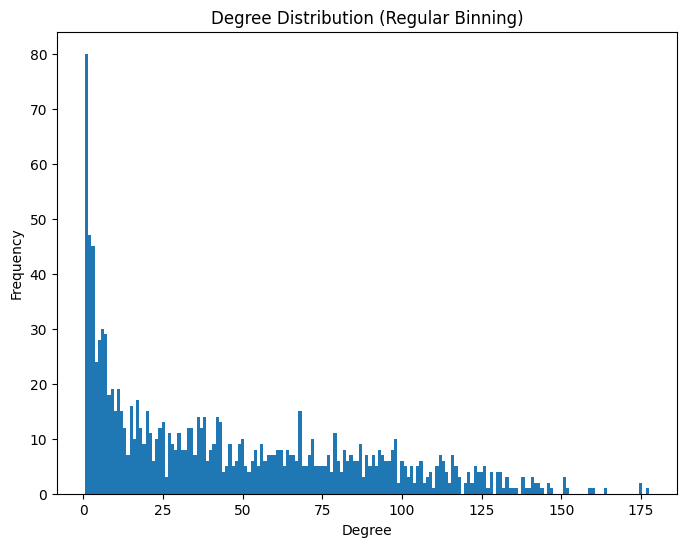

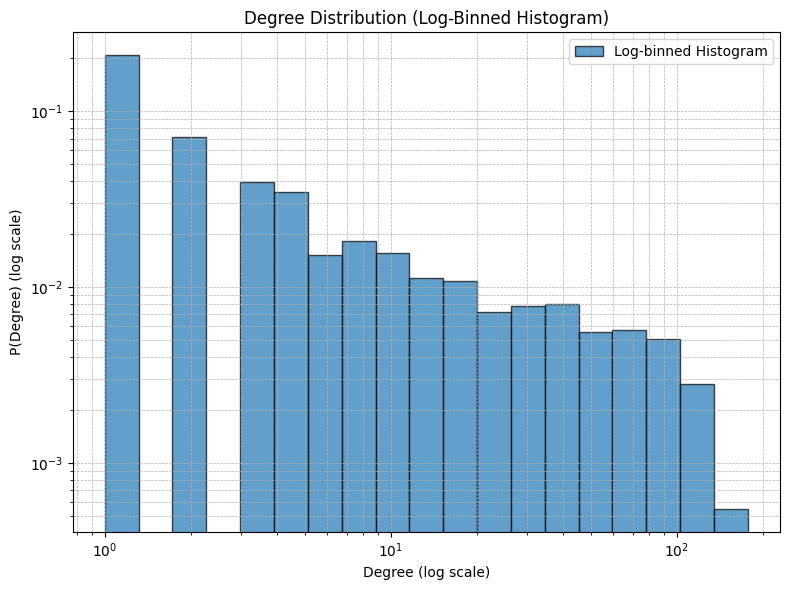

In [4]:
from degree_analysis import create_graph, plot_degree_dist
csv_file_path = "outputs/adjacency_matrix.csv"  # Replace with your file

G = create_graph(csv_file_path)

print("Number of nodes = ", G.number_of_nodes())
print("Number of edges = ", G.number_of_edges())

plot_degree_dist(G)

Computing Centralities

In [5]:
from centralities import print_top



# Eigenvector Centrality
eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000)
top_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print_top("Eigenvector Centrality", top_eigen)


# TAKING VERY LONG TO COMPUTE BECAUSE OF HIGH NUMBER OF NODES AND EDGES
# Katz Centrality
# katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=5000)
# top_katz = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
# print_top("Katz Centrality", top_katz)


# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print_top("Betweenness Centrality", top_betweenness)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print_top("Closeness Centrality", top_closeness)

# HITS (Authority and Hub Scores)
hits_hubs, hits_auth = nx.hits(G, max_iter=1000)
top_hubs = sorted(hits_hubs.items(), key=lambda x: x[1], reverse=True)[:10]
top_auths = sorted(hits_auth.items(), key=lambda x: x[1], reverse=True)[:10]
print_top("HITS - Hub Scores", top_hubs)
print_top("HITS - Authority Scores", top_auths)


Top nodes by Eigenvector Centrality:
Node MASTEK: 0.1233
Node INTELLECT: 0.1137
Node CDSL: 0.1118
Node HCLTECH: 0.1077
Node APLAPOLLO: 0.1075
Node VERTOZ: 0.1071
Node LTIM: 0.1069
Node HIL: 0.1067
Node GAEL: 0.1064
Node INFY: 0.1063

Top nodes by Betweenness Centrality:
Node VISAKAIND: 0.0279
Node DAAWAT: 0.0256
Node SPTL: 0.0256
Node CAPACITE: 0.0202
Node MUNJALSHOW: 0.0191
Node NCC: 0.0175
Node IDFC: 0.0151
Node JINDALSTEL: 0.0143
Node JKIL: 0.0141
Node PRECWIRE: 0.0138

Top nodes by Closeness Centrality:
Node SUMMITSEC: 0.2793
Node GRASIM: 0.2787
Node EMKAY: 0.2778
Node AUTOAXLES: 0.2774
Node HINDALCO: 0.2765
Node SUNDRMFAST: 0.2762
Node JSWSTEEL: 0.2761
Node TATAPOWER: 0.2761
Node PCBL: 0.2749
Node JAMNAAUTO: 0.2738

Top nodes by HITS - Hub Scores:
Node MASTEK: 0.0072
Node INTELLECT: 0.0067
Node CDSL: 0.0066
Node HCLTECH: 0.0063
Node APLAPOLLO: 0.0063
Node VERTOZ: 0.0063
Node LTIM: 0.0063
Node HIL: 0.0063
Node GAEL: 0.0063
Node INFY: 0.0062

Top nodes by HITS - Authority Scores:
N

Modularity and Community Detection 

In [6]:
# 2. Detect communities using Louvain algorithm
partition = community_louvain.best_partition(G)

# 3. Number of communities
num_communities = len(set(partition.values()))
print(f"Number of communities: {num_communities}")

# 5. Compute modularity score
modularity = community_louvain.modularity(partition, G)
print(f"Modularity score: {modularity:.4f}")

# Count nodes in each community
community_sizes = Counter(partition.values())
print("Community sizes:")
for community_id, size in community_sizes.items():
    print(f"Community {community_id}: {size} nodes")


Number of communities: 319
Modularity score: 0.5642
Community sizes:
Community 0: 305 nodes
Community 1: 220 nodes
Community 2: 1 nodes
Community 3: 87 nodes
Community 4: 255 nodes
Community 5: 259 nodes
Community 6: 1 nodes
Community 11: 82 nodes
Community 8: 1 nodes
Community 9: 1 nodes
Community 10: 1 nodes
Community 12: 1 nodes
Community 13: 1 nodes
Community 14: 1 nodes
Community 15: 1 nodes
Community 16: 1 nodes
Community 17: 1 nodes
Community 18: 1 nodes
Community 19: 1 nodes
Community 20: 1 nodes
Community 21: 1 nodes
Community 22: 1 nodes
Community 23: 1 nodes
Community 24: 1 nodes
Community 25: 1 nodes
Community 26: 1 nodes
Community 27: 1 nodes
Community 28: 1 nodes
Community 29: 1 nodes
Community 30: 1 nodes
Community 31: 1 nodes
Community 32: 1 nodes
Community 33: 1 nodes
Community 34: 1 nodes
Community 35: 1 nodes
Community 36: 1 nodes
Community 37: 1 nodes
Community 38: 1 nodes
Community 39: 3 nodes
Community 40: 1 nodes
Community 41: 1 nodes
Community 42: 1 nodes
Commun

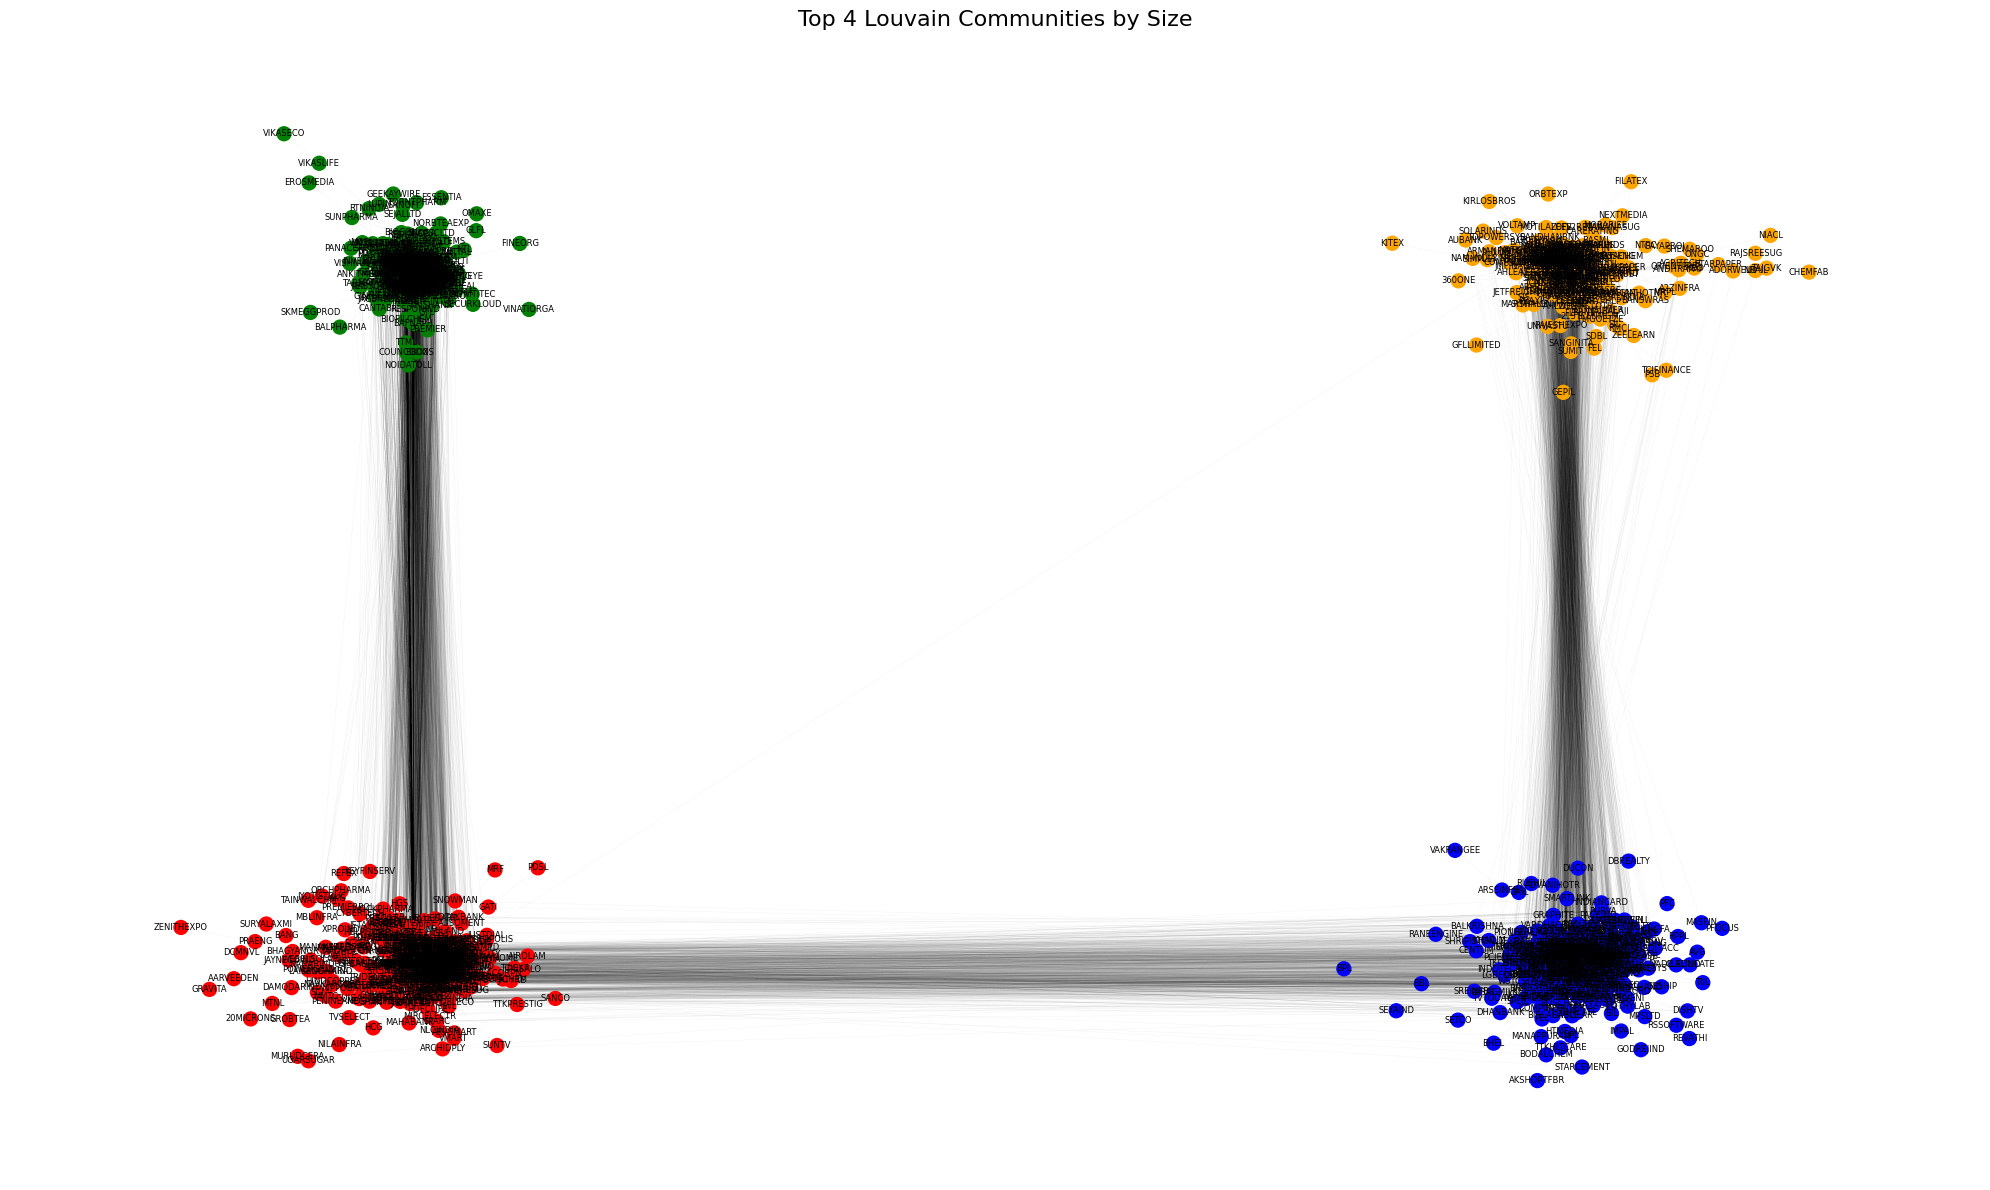

In [7]:
# Step 2: Count sizes of each community
comm_counter = Counter(partition.values())
top_4_communities = [c for c, _ in comm_counter.most_common(4)]

# Step 3: Assign distinct colors to top 4 communities
color_map = {
    top_4_communities[0]: 'red',
    top_4_communities[1]: 'blue',
    top_4_communities[2]: 'green',
    top_4_communities[3]: 'orange'
}
default_color = 'lightgray'

# Step 4: Positioning - layout that clusters by community
# Separate layout per community with shifting
pos = {}
for i, comm_id in enumerate(top_4_communities):
    nodes = [n for n in G.nodes() if partition[n] == comm_id]
    sub_pos = nx.spring_layout(G.subgraph(nodes), seed=42)
    shift_x, shift_y = (i % 2) * 5, (i // 2) * 5
    for node in sub_pos:
        pos[node] = (sub_pos[node][0] + shift_x, sub_pos[node][1] + shift_y)

# Add remaining nodes (other communities) to pos (optional)
for node in G.nodes():
    if node not in pos:
        pos[node] = (0, 0)  # collapsed in a corner

# Step 5: Assign colors
node_colors = [
    color_map[partition[n]] if partition[n] in top_4_communities else default_color
    for n in G.nodes()
]

# Step 6: Draw
plt.figure(figsize=(20, 12))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3)
nx.draw_networkx_labels(G, pos, font_size=6)

plt.title("Top 4 Louvain Communities by Size", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

Assortativity & Degree-Degree Correlations

Degree Assortativity (Pearson correlation coefficient): 0.2585


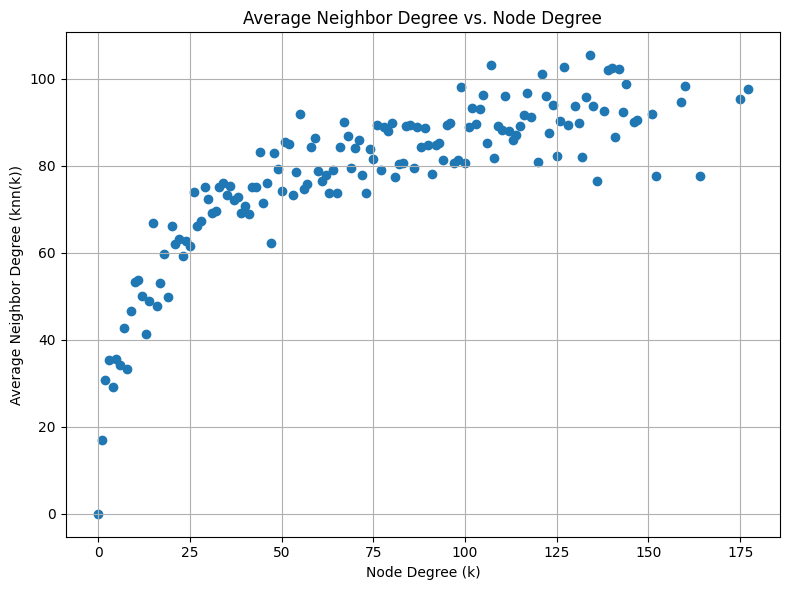

Interpretation: The network is assortative (high-degree nodes tend to connect to other high-degree nodes).


In [8]:
# 1. Degree Assortativity Coefficient
assortativity = nx.degree_pearson_correlation_coefficient(G)
print(f"Degree Assortativity (Pearson correlation coefficient): {assortativity:.4f}")

# 2. Average Neighbor Degree vs. Node Degree
degree = dict(G.degree())
avg_neighbor_deg = nx.average_neighbor_degree(G)

# Group by degree and compute mean of neighbor degrees for each degree value
deg_values = sorted(set(degree.values()))
avg_neighbor_by_deg = []
for k in deg_values:
    nodes_with_k = [n for n in G.nodes() if degree[n] == k]
    if nodes_with_k:
        mean_neighbor_deg = np.mean([avg_neighbor_deg[n] for n in nodes_with_k])
        avg_neighbor_by_deg.append(mean_neighbor_deg)
    else:
        avg_neighbor_by_deg.append(0)

# Plot average neighbor degree vs. node degree
plt.figure(figsize=(8, 6))
plt.scatter(deg_values, avg_neighbor_by_deg, marker='o')
plt.xlabel("Node Degree (k)")
plt.ylabel("Average Neighbor Degree (knn(k))")
plt.title("Average Neighbor Degree vs. Node Degree")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Interpretation
if assortativity > 0.1:
    print("Interpretation: The network is assortative (high-degree nodes tend to connect to other high-degree nodes).")
elif assortativity < -0.1:
    print("Interpretation: The network is disassortative (high-degree nodes tend to connect to low-degree nodes).")
else:
    print("Interpretation: The network is neutral (no strong preference in degree correlation).")


CLustering Coefficients

Global Clustering Coefficient (Transitivity): 0.4992
Random Graph Clustering Coefficient: 0.0243

Top 10 Nodes by Degree - Clustering Coefficients:
        Node  Degree  Local Clustering Coef
0  INTELLECT     177               0.385015
1        HIL     175               0.357176
2     MASTEK     175               0.430608
3       JKIL     164               0.343035
4  APLAPOLLO     160               0.427201
5       CDSL     159               0.467319
6  FINCABLES     152               0.367985
7       GPIL     151               0.427638
8       PCBL     151               0.373157
9  VISAKAIND     151               0.365121


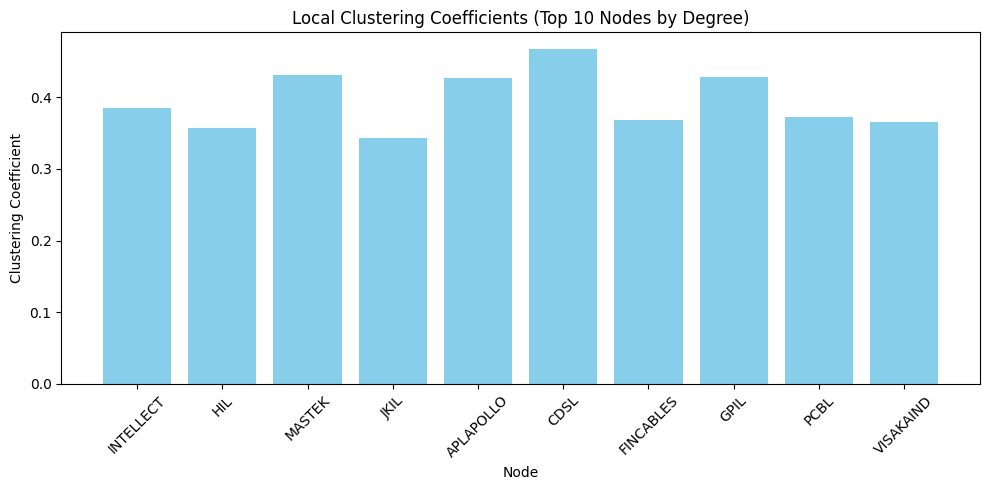

In [9]:
# Step 1: Global Clustering Coefficient (Transitivity)
global_clustering = nx.transitivity(G)
print(f"Global Clustering Coefficient (Transitivity): {global_clustering:.4f}")

# Step 2: Compare to Random Graph (same number of nodes and edges)
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
p_edge = (2 * n_edges) / (n_nodes * (n_nodes - 1))  # approximate edge probability

G_random = nx.gnp_random_graph(n=n_nodes, p=p_edge, seed=42)
random_clustering = nx.transitivity(G_random)
print(f"Random Graph Clustering Coefficient: {random_clustering:.4f}")

# Step 3: Local Clustering Coefficients
local_clustering = nx.clustering(G)

# Step 4: Top 10 nodes by degree
top_degree_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]
top_nodes = [node for node, _ in top_degree_nodes]

# Create a table
clustering_data = {
    "Node": top_nodes,
    "Degree": [G.degree(n) for n in top_nodes],
    "Local Clustering Coef": [local_clustering[n] for n in top_nodes]
}

df_clustering = pd.DataFrame(clustering_data)
print("\nTop 10 Nodes by Degree - Clustering Coefficients:")
print(df_clustering)

# Step 5 (Optional): Plot
plt.figure(figsize=(10, 5))
plt.bar(df_clustering["Node"], df_clustering["Local Clustering Coef"], color="skyblue")
plt.title("Local Clustering Coefficients (Top 10 Nodes by Degree)")
plt.xlabel("Node")
plt.ylabel("Clustering Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For a detailed report check the pdf attached in this repository.